Hypothesis: I believe that students that have had more prior programming experience  will expect a higher grade in COMP 110 than those who have never taken a formal programming course.
-------

First we must import our data using the following code. I will also include some other commands from the data wrangling example for consistentcy.

In [39]:
__author__ = "720332576"

%reload_ext autoreload
%autoreload 2
DATA_DIRECTORY="../data"
DATA_FILE_PATH=f"{DATA_DIRECTORY}/survey.csv"

I will now open our file and convert it into columnar format using some functions that I wrote previously. The data_utils module is in another directory so we will have to be a bit creative

In [52]:
import sys

sys.path
sys.path.append('../exercises/ex04')

from data_utils import *

data_rows: list[dict[str, str]] = read_csv_rows(DATA_FILE_PATH)
data_cols: dict[str, list[str]] = columnar(data_rows)


Our data should now be in a columnar format. Let's check by viewing the first 5 rows of our data by using the head and tabulate functions.

In [53]:
from tabulate import tabulate
data_cols_head: dict[str, list[str]] = head(data_cols, 5)
tabulate(data_cols_head, data_cols_head.keys(), "html")

row_number,year,unc_status,comp_major,primary_major,prereqs,prior_exp,AP_Principles,AP_A,other_comp,prior_time,languages,residency,on_campus,international,section,lesson_time,sync_perf,all_sync,own_notes,own_examples,oh_visits,ls_effective,lsqs_effective,programming_effective,qz_effective,oh_effective,tutoring_effective,kaki_effective,pace,difficulty,understanding,interested,valuable,grade,would_recommend
0,21,Returning UNC Student,No,Public Health,"MATH 231, MATH 232, MATH 233, STOR 155",1-2 years,No,No,UNC,1 month or so,"Python, R / Matlab / SAS, Other",Out-of-state,Yes,I am living in the United States,Section 2 - 5:00pm - Async,1,3,3,7,4,2,3,5,3,4,7,3,4,5,5,5,7,7,A,6
1,23,Returning UNC Student,No,Statistics,"MATH 130, MATH 231, STOR 120, STOR 151",2-6 months,No,No,UNC,None to less than one month!,Python,In-state,Yes,I am living in the United States,Section 1 - 3:30pm - Sync + Async,1,4,3,6,1,5,5,2,3,7,7,,7,7,7,3,7,7,B,7
2,23,Returning UNC Student,No,Statistics,"MATH 130, MATH 231, STOR 120, STOR 151",2-6 months,No,No,UNC,None to less than one month!,Python,In-state,Yes,I am living in the United States,Section 1 - 3:30pm - Sync + Async,1,4,3,6,1,5,5,2,3,7,7,,7,7,7,3,7,7,B,7
3,23,Incoming Transfer Student,No,Sociology,"MATH 231, MATH 232, MATH 233, MATH 347, MATH 381, STOR 155",2-6 months,No,No,On-line course,None to less than one month!,"Python, Java / C#, R / Matlab / SAS, HTML / CSS, SQL",Out-of-state,No,I am living Internationally,Section 1 - 3:30pm - Sync + Async,4,4,4,6,4,0,6,6,6,6,,,7,4,4,5,5,6,A,6
4,24,Incoming First-year Student,Yes - BS,Computer Science,"MATH 129P, MATH 231, MATH 232, MATH 233, STOR 120, STOR 155",7-12 months,Yes,Yes,High school course (IB or other),1 month or so,"Python, Java / C#, BASIC",In-state,No,I am living in the United States,Section 1 - 3:30pm - Sync + Async,4,4,4,5,4,0,4,5,6,4,,,,3,5,5,4,5,A,4


The data appears correct. I will now select just the columns that I will be using for my analysis

In [65]:
from numpy import unique

selected_data: dict[str, list[str]] = select(data_cols, ["prior_exp", "grade"])
for key in selected_data:
    print(unique(selected_data[key]))

['1-2 years' '2-6 months' '7-12 months' 'None to less than one month!'
 'Over 2 years']
['A' 'B' 'C' 'D']


I now have the two columns of data that I need. I also printed out all the unique values to see what we're working with. Let's put together a couple graphs to see how our class breaks down.

{'1-2 years': 16, '2-6 months': 119, '7-12 months': 25, 'None to less than one month!': 332, 'Over 2 years': 10}
{'A': 237, 'B': 211, 'C': 47, 'D': 7}


<BarContainer object of 4 artists>

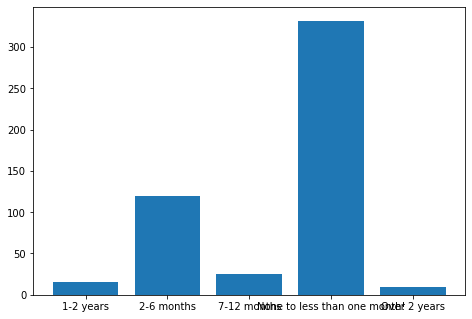

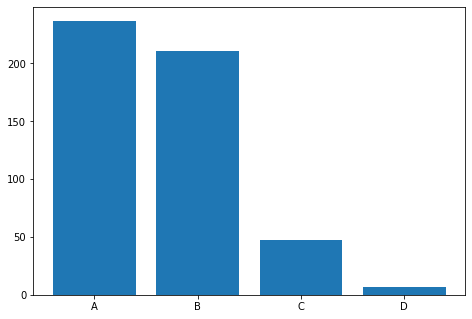

In [86]:
import matplotlib.pyplot as pyplot

exp_counts: dict[str, int] = count(selected_data["prior_exp"])
print(exp_counts)
fig1 = pyplot.figure()
ax1 = fig1.add_axes([0,0,1,1])
ax1.bar(exp_counts.keys(),exp_counts.values())

grade_counts: dict[str, int] = count(selected_data["grade"])
print(grade_counts)
fig2 = pyplot.figure()
ax2 = fig2.add_axes([0,0,1,1])
ax2.bar(grade_counts.keys(),grade_counts.values())


Our plots were a success. A huge majority of our class began with none to <1 month of programming experience. It also shows that most of our class is expecting an A or a B. Let's do some quick statistics and then drill down further.

In [95]:
classApercent: float = grade_counts['A'] / sum(grade_counts.values())
print(classApercent)

0.4721115537848606


About 47% of our class is expecting an A. I will mask some of the data and recalculate a new average of the masked data.

First, I will write a function that masks our data.

In [111]:
def mymask(col: list[str], filters: list[str]) -> list[bool]:
    """Filters a list of strs based upon another list that you designate."""
    mask: list[bool] = []
    for item in col:
        mask.append(item in filters)
    return mask

I'll use the function to extract just the grades for the students with <1 month of programming.

In [137]:
mask1 = mymask(selected_data['prior_exp'], ['None to less than one month!'])
grade_mask: list[str] = []
i = 0
for each in selected_data['grade']:
    if mask1[i] == True:
        grade_mask.append(each)
    i += 1


The count function will be used again along with the graphs. Let's see our results!

{'A': 137, 'B': 157, 'C': 32, 'D': 6}


<BarContainer object of 4 artists>

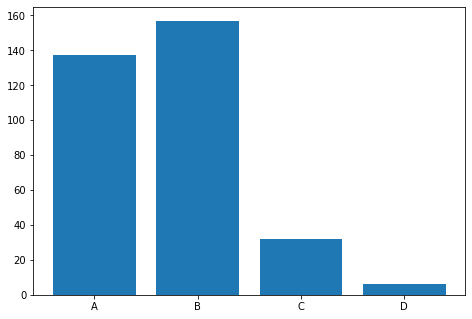

In [136]:
grade_mask_counts: dict[str, int] = count(sorted(grade_mask))
print(grade_mask_counts)
fig3 = pyplot.figure()
ax3 = fig3.add_axes([0,0,1,1])
ax3.bar(grade_mask_counts.keys(),grade_mask_counts.values())

Compared to the entire class, only 41.2% of those with <1 programming experience are expecting an A. While I haven't run tests to compare the means, there is a pretty obvious decrease in grade expected for those with <1 month programming experience. It appears that most of them responsed that they would receive a B compared to the total class average response of an A. Therefore, I believe my original hypothesis is correct!